In [1]:
import pandas as pd
df = pd.read_excel("data.xlsx")

In [3]:
df.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Sno,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,0,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858,M,1,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,2,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,1004,47,blue collar,married,unknown,3207754,F,3,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,1005,33,unknown,single,unknown,2562322,M,4,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [5]:
df.shape


(45211, 20)

In [7]:
df.columns

Index(['Customer_number', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender', 'Sno', 'Insurance', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'last_contact_day',
       'previous', 'poutcome', 'Term Deposit', 'Count_Txn'],
      dtype='object')

In [9]:
df=df.drop('Sno', axis=1)

In [11]:
df.shape

(45211, 19)

In [13]:
df.columns

Index(['Customer_number', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender', 'Insurance', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'last_contact_day', 'previous',
       'poutcome', 'Term Deposit', 'Count_Txn'],
      dtype='object')

In [15]:
import numpy as np

# Missing Values

In [18]:

## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, " ----> ",np.round(df[feature].isnull().mean(), 4),  ' % missing values')

job  ---->  0.0003  % missing values
marital  ---->  0.0004  % missing values
education  ---->  0.0005  % missing values
Annual Income  ---->  0.0004  % missing values
balance  ---->  0.0012  % missing values
loan  ---->  0.0002  % missing values
contact  ---->  0.001  % missing values
duration  ---->  0.0009  % missing values
poutcome  ---->  0.0003  % missing values
Term Deposit  ---->  0.0002  % missing values


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue collar' 'unknown'
 'retired' 'admin.' 'services' 'blue-collar' 'self-employed' 'unemployed'
 'housemaid' 'student' nan]
marital
['married' 'single' 'divorced' nan]
education
['tertiary' 'secondary' nan 'unknown' 'ter tiary' 'primary' 'Primary']
Annual Income
[839368 1452858 4851383 ... 443512 4193684 3617935]
Gender
['M' 'F']
Insurance
['no' 'yes']
balance
[2143 29 2 ... 8205 14204 16353]
housing
['yes' 'no']
loan
['no' 'yes' nan]
contact
[nan 'unknown' '?' 'cellular' 'telephone' 'Mobile' 'Tel']
poutcome
['unknown' nan 'pending' '????' '?' 'failure' 'other' 'success']
Term Deposit
['no' 'yes' nan]


In [24]:
for column in df.columns:
    print(column,df[column].nunique())

Customer_number 45211
age 80
job 13
marital 3
education 6
Annual Income 44972
Gender 2
Insurance 2
balance 6268
housing 2
loan 2
contact 6
duration 1581
campaign 48
last_contact_day 563
previous 41
poutcome 7
Term Deposit 2
Count_Txn 408


# Explore the Categorical Features

In [27]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['Term Deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'Annual Income',
 'Gender',
 'Insurance',
 'balance',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [29]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 14
The feature is marital and number of categories are 4
The feature is education and number of categories are 7
The feature is Annual Income and number of categories are 44973
The feature is Gender and number of categories are 2
The feature is Insurance and number of categories are 2
The feature is balance and number of categories are 6269
The feature is housing and number of categories are 2
The feature is loan and number of categories are 3
The feature is contact and number of categories are 7
The feature is poutcome and number of categories are 8


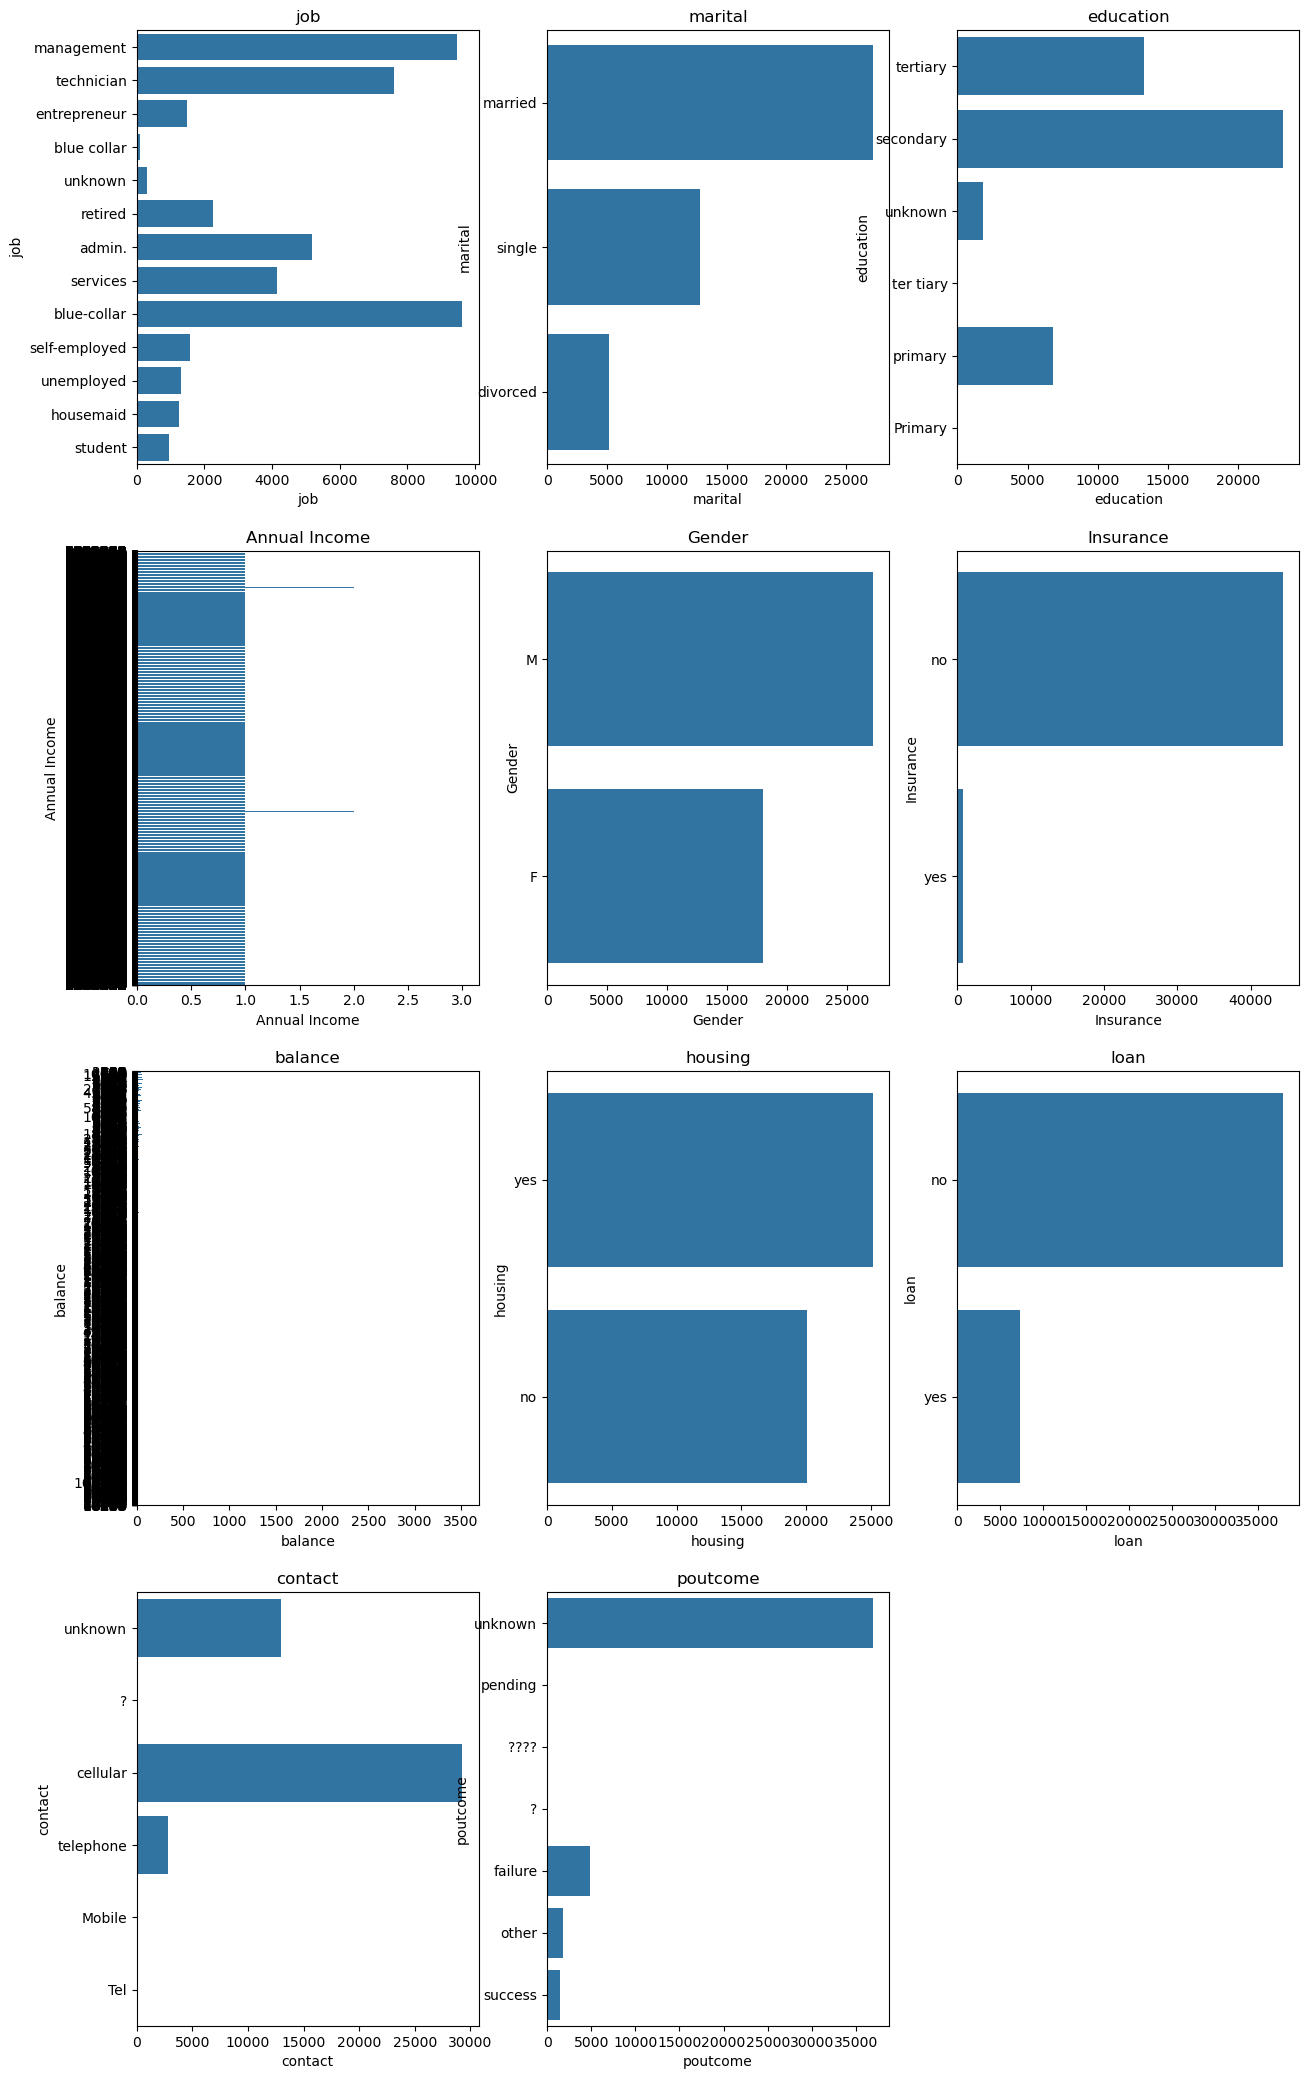

In [31]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [33]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Term Deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,Customer_number,age,duration,campaign,last_contact_day,previous,Count_Txn
0,1001,58,261.0,1,2,0,351.0
1,1002,44,151.0,1,2,0,326.0
2,1003,33,76.0,1,2,0,422.0
3,1004,47,92.0,1,2,0,113.0
4,1005,33,198.0,1,2,0,342.0


In [35]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [37]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Term Deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\974582242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\974582242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
C:\Users\yarra\AppData\L

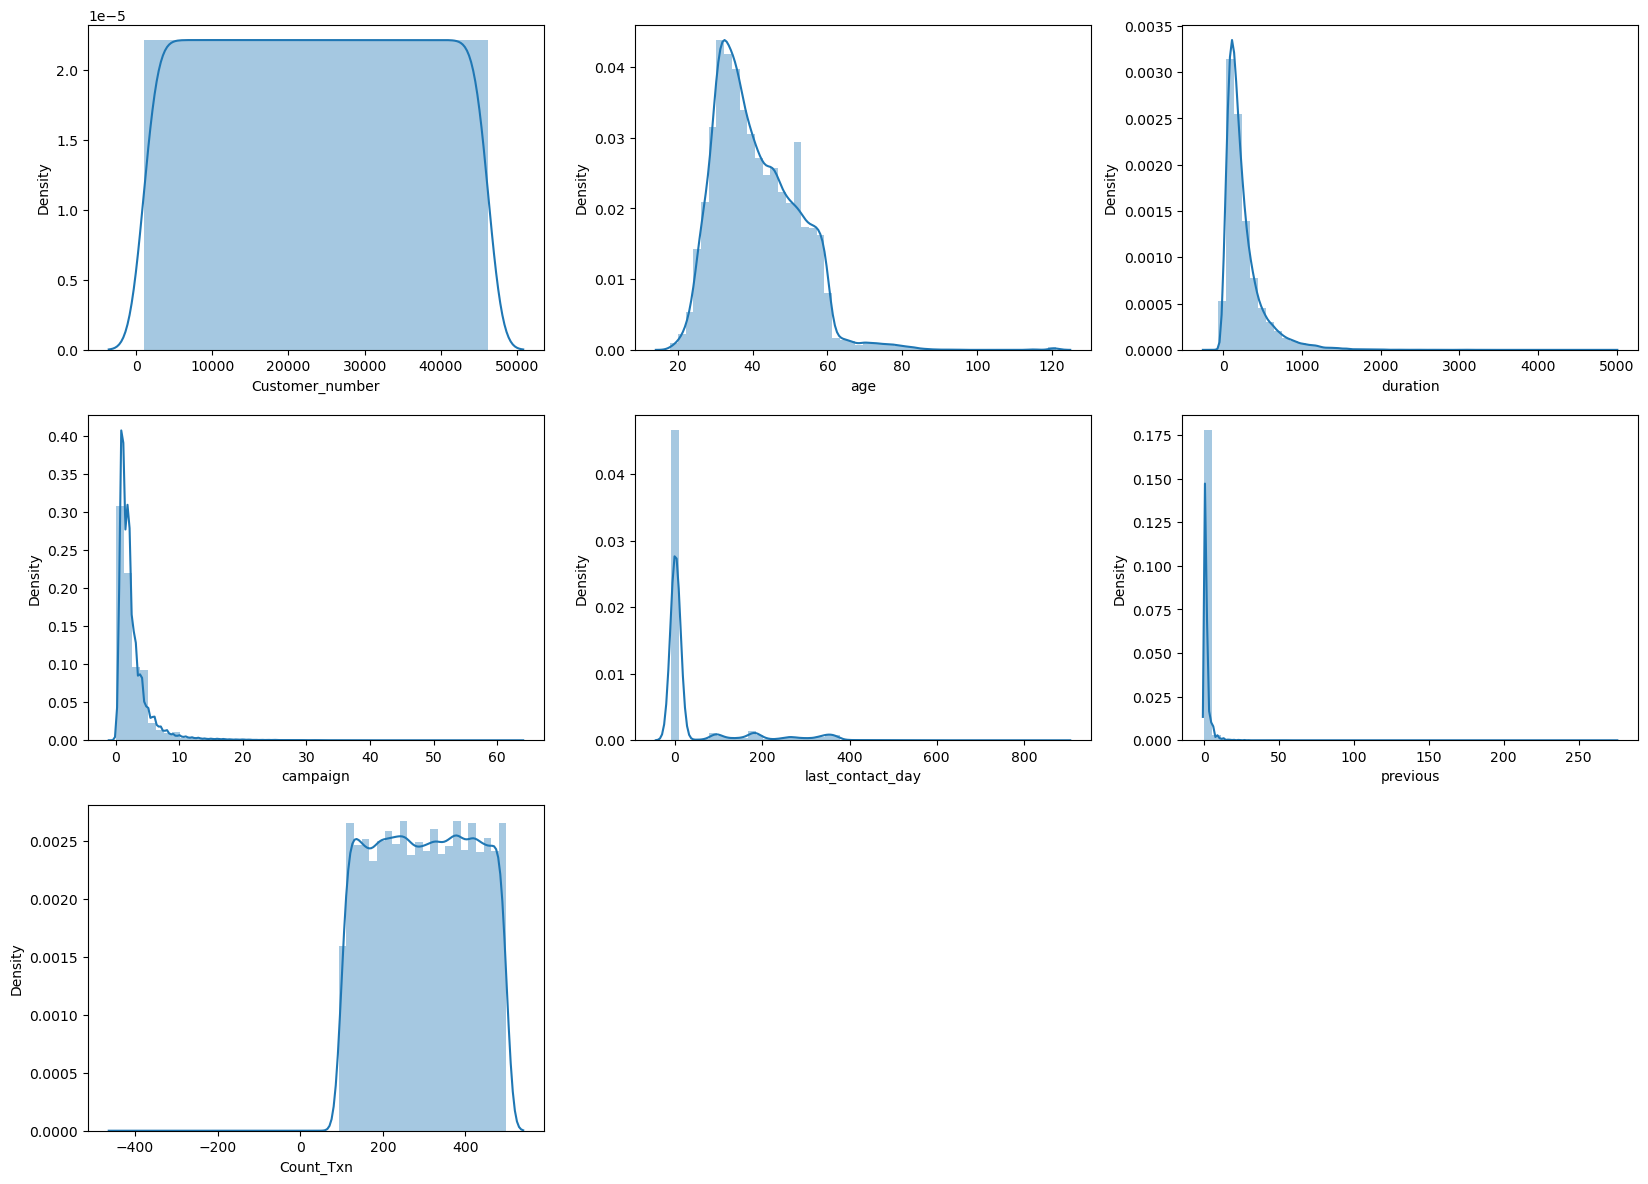

In [39]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

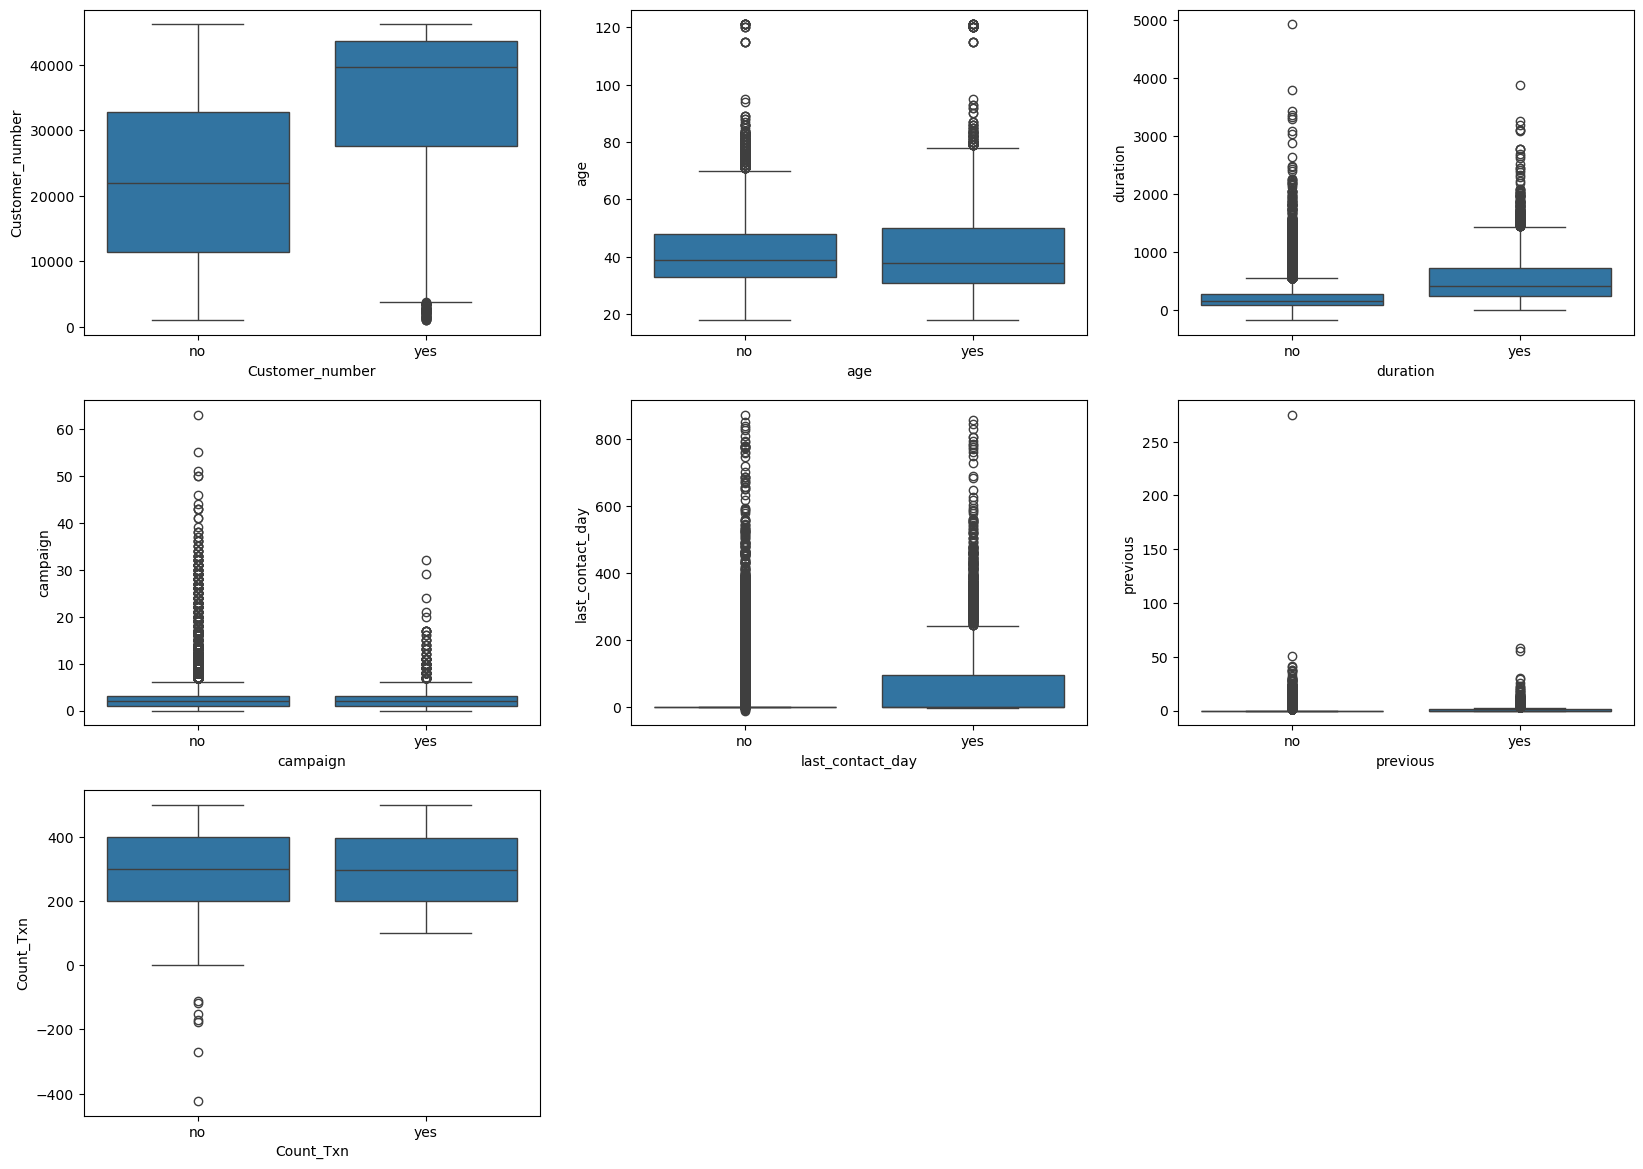

In [41]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Term Deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

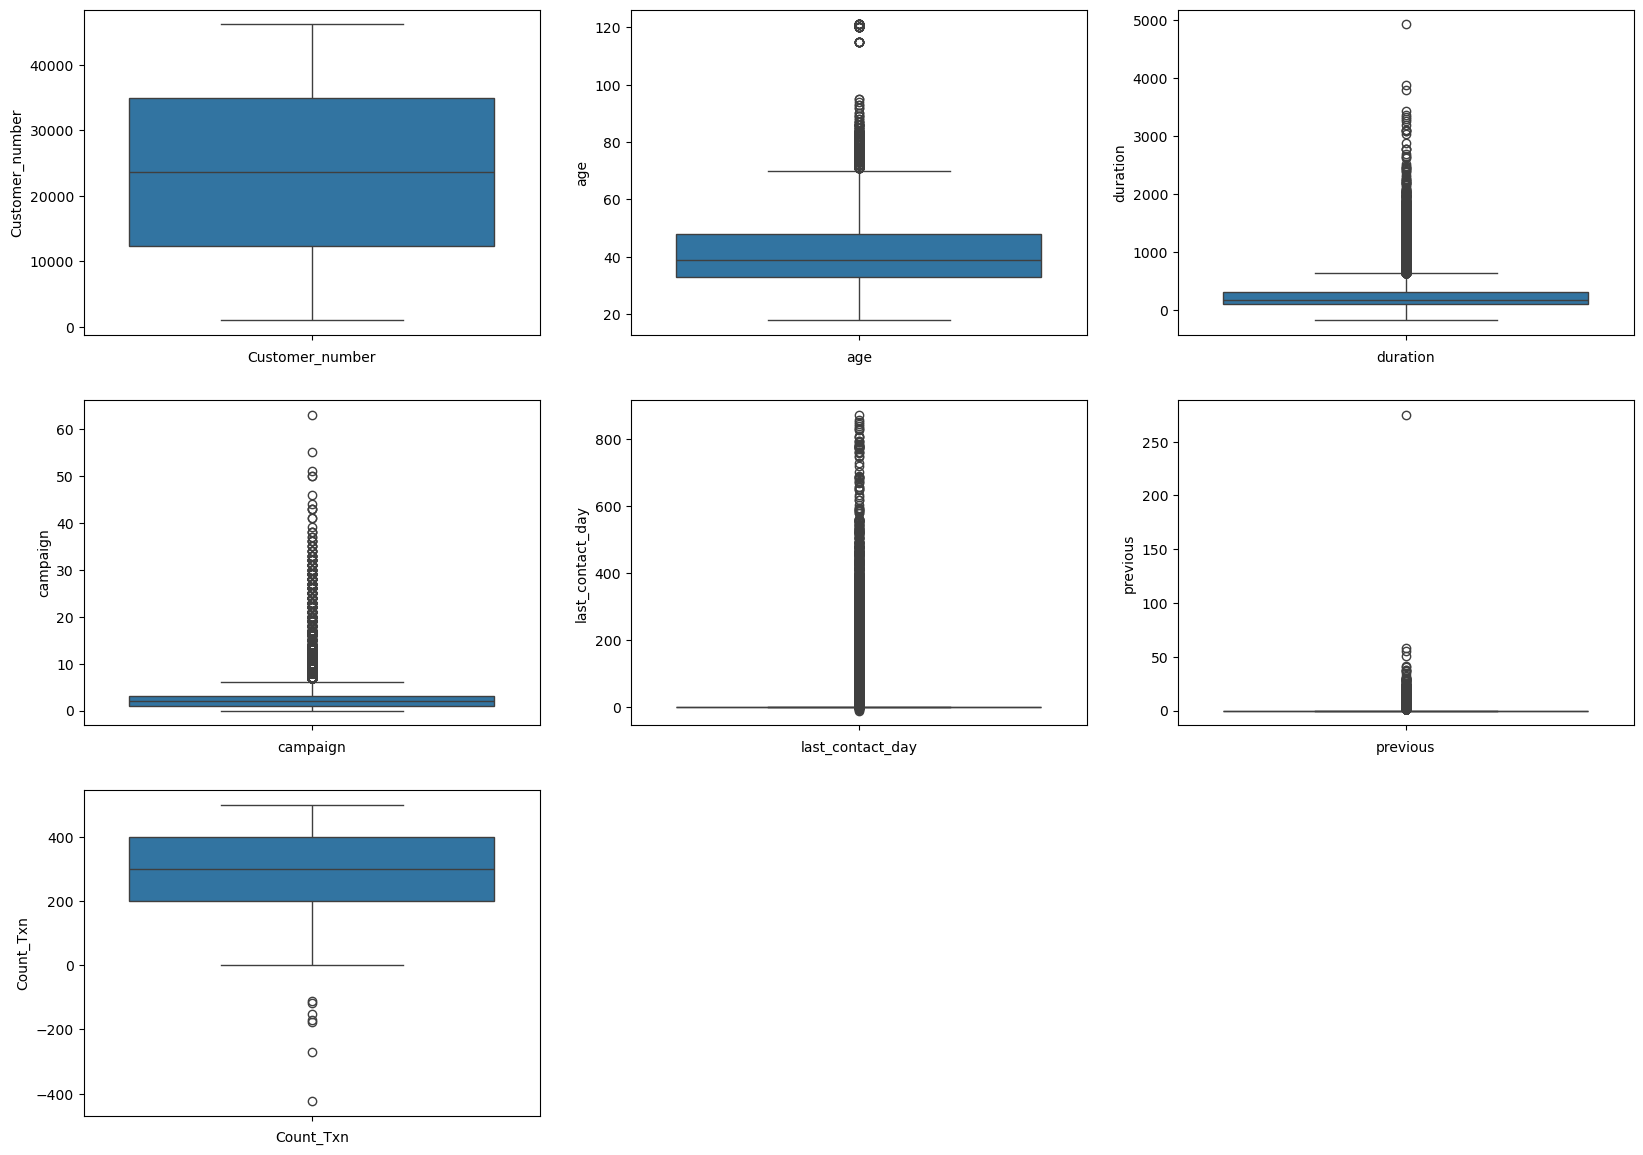

In [42]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

# Preprocessing

In [45]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
df['Term Deposit'].replace(to_replace='yes', value=1, inplace=True)
df['Term Deposit'].replace(to_replace='no',  value=0, inplace=True)
df['Term Deposit'].head()

C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\1113414795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Term Deposit'].replace(to_replace='yes', value=1, inplace=True)
C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\1113414795.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Term Deposit, dtype: float64

In [47]:
df.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,no,2143,yes,no,NaN,261.0,1,2,0,unknown,0.0,351.0
1,1002,44,technician,single,secondary,1452858,M,no,29,yes,no,unknown,151.0,1,2,0,unknown,0.0,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,no,2,yes,yes,unknown,76.0,1,2,0,NaN,0.0,422.0
3,1004,47,blue collar,married,unknown,3207754,F,no,1506,yes,no,unknown,92.0,1,2,0,unknown,0.0,113.0
4,1005,33,unknown,single,unknown,2562322,M,no,1,no,no,unknown,198.0,1,2,0,unknown,0.0,342.0


In [49]:
df['loan'].replace(to_replace='no', value=1, inplace=True)
df['loan'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\3096895689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan'].replace(to_replace='no', value=1, inplace=True)
C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\3096895689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

,Customer_number,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,no,2143,yes,1.0,NaN,261.0,1,2,0,unknown,0.0,351.0
1,1002,44,technician,single,secondary,1452858,M,no,29,yes,1.0,unknown,151.0,1,2,0,unknown,0.0,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,no,2,yes,0.0,unknown,76.0,1,2,0,NaN,0.0,422.0
3,1004,47,blue collar,married,unknown,3207754,F,no,1506,yes,1.0,unknown,92.0,1,2,0,unknown,0.0,113.0
4,1005,33,unknown,single,unknown,2562322,M,no,1,no,1.0,unknown,198.0,1,2,0,unknown,0.0,342.0


In [51]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
df['housing'].replace(to_replace='no', value=1, inplace=True)
df['housing'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\3618151152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['housing'].replace(to_replace='no', value=1, inplace=True)
C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\3618151152.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

,Customer_number,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,no,2143,0,1.0,NaN,261.0,1,2,0,unknown,0.0,351.0
1,1002,44,technician,single,secondary,1452858,M,no,29,0,1.0,unknown,151.0,1,2,0,unknown,0.0,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,no,2,0,0.0,unknown,76.0,1,2,0,NaN,0.0,422.0
3,1004,47,blue collar,married,unknown,3207754,F,no,1506,0,1.0,unknown,92.0,1,2,0,unknown,0.0,113.0
4,1005,33,unknown,single,unknown,2562322,M,no,1,1,1.0,unknown,198.0,1,2,0,unknown,0.0,342.0


In [53]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['marital'])
df = df.drop('marital',axis = 1)
df = df.join(one_hot)

In [55]:
df.head()

,Customer_number,age,job,education,Annual Income,Gender,Insurance,balance,housing,loan,...,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,divorced,married,single
0,1001,58,management,tertiary,839368,M,no,2143,0,1.0,...,261.0,1,2,0,unknown,0.0,351.0,False,True,False
1,1002,44,technician,secondary,1452858,M,no,29,0,1.0,...,151.0,1,2,0,unknown,0.0,326.0,False,False,True
2,1003,33,entrepreneur,NaN,4851383,F,no,2,0,0.0,...,76.0,1,2,0,NaN,0.0,422.0,False,True,False
3,1004,47,blue collar,unknown,3207754,F,no,1506,0,1.0,...,92.0,1,2,0,unknown,0.0,113.0,False,True,False
4,1005,33,unknown,unknown,2562322,M,no,1,1,1.0,...,198.0,1,2,0,unknown,0.0,342.0,False,False,True


In [57]:
df = df.drop('divorced',axis = 1)

In [59]:
df['education'] = df['education'].str.lower().replace({
    'ter tiary': 'tertiary',
    'primary': 'primary'
})

In [61]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['education'])
df = df.drop('education',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)


In [63]:
df.head()

,Customer_number,age,job,Annual Income,Gender,Insurance,balance,housing,loan,contact,...,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,married,single,primary,secondary,tertiary
0,1001,58,management,839368,M,no,2143,0,1.0,NaN,...,2,0,unknown,0.0,351.0,True,False,False,False,True
1,1002,44,technician,1452858,M,no,29,0,1.0,unknown,...,2,0,unknown,0.0,326.0,False,True,False,True,False
2,1003,33,entrepreneur,4851383,F,no,2,0,0.0,unknown,...,2,0,NaN,0.0,422.0,True,False,False,False,False
3,1004,47,blue collar,3207754,F,no,1506,0,1.0,unknown,...,2,0,unknown,0.0,113.0,True,False,False,False,False
4,1005,33,unknown,2562322,M,no,1,1,1.0,unknown,...,2,0,unknown,0.0,342.0,False,True,False,False,False


In [69]:
one_hot = pd.get_dummies(df['job'])
df = df.drop('job',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)


In [71]:
df.head()

,Customer_number,age,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,1001,58,839368,M,no,2143,0,1.0,NaN,261.0,...,False,False,False,True,False,False,False,False,False,False
1,1002,44,1452858,M,no,29,0,1.0,unknown,151.0,...,False,False,False,False,False,False,False,False,True,False
2,1003,33,4851383,F,no,2,0,0.0,unknown,76.0,...,False,True,False,False,False,False,False,False,False,False
3,1004,47,3207754,F,no,1506,0,1.0,unknown,92.0,...,False,False,False,False,False,False,False,False,False,False
4,1005,33,2562322,M,no,1,1,1.0,unknown,198.0,...,False,False,False,False,False,False,False,False,False,False


In [73]:

# one hot encoding for contact feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['contact'])
df = df.drop('contact',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)


In [87]:
df.head()

,Customer_number,age,Annual Income,Gender,Insurance,balance,housing,loan,duration,campaign,...,retired,self-employed,services,student,technician,unemployed,Mobile,Tel,cellular,telephone
0,1001,58,839368,M,no,2143,0,1.0,261.0,1,...,False,False,False,False,False,False,False,False,False,False
1,1002,44,1452858,M,no,29,0,1.0,151.0,1,...,False,False,False,False,True,False,False,False,False,False
2,1003,33,4851383,F,no,2,0,0.0,76.0,1,...,False,False,False,False,False,False,False,False,False,False
3,1004,47,3207754,F,no,1506,0,1.0,92.0,1,...,False,False,False,False,False,False,False,False,False,False
4,1005,33,2562322,M,no,1,1,1.0,198.0,1,...,False,False,False,False,False,False,False,False,False,False


In [81]:
df.columns

Index(['Customer_number', 'age', 'Annual Income', 'Gender', 'Insurance',
       'balance', 'housing', 'loan', 'duration', 'campaign',
       'last_contact_day', 'previous', 'poutcome', 'Term Deposit', 'Count_Txn',
       'married', 'single', 'primary', 'secondary', 'tertiary', 'admin.',
       'blue collar', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', '?', 'Mobile', 'Tel', 'cellular', 'telephone'],
      dtype='object')

In [83]:
df = df.drop('?',axis = 1)

In [85]:
df.columns

Index(['Customer_number', 'age', 'Annual Income', 'Gender', 'Insurance',
       'balance', 'housing', 'loan', 'duration', 'campaign',
       'last_contact_day', 'previous', 'poutcome', 'Term Deposit', 'Count_Txn',
       'married', 'single', 'primary', 'secondary', 'tertiary', 'admin.',
       'blue collar', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'Mobile', 'Tel', 'cellular', 'telephone'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_number   45211 non-null  int64  
 1   age               45211 non-null  int64  
 2   Annual Income     45211 non-null  int64  
 3   Gender            45211 non-null  object 
 4   Insurance         45211 non-null  object 
 5   balance           45156 non-null  object 
 6   housing           45211 non-null  int64  
 7   loan              45203 non-null  float64
 8   duration          45172 non-null  float64
 9   campaign          45211 non-null  int64  
 10  last_contact_day  45211 non-null  int64  
 11  previous          45211 non-null  int64  
 12  Term Deposit      45203 non-null  float64
 13  Count_Txn         45210 non-null  float64
 14  married           45211 non-null  bool   
 15  single            45211 non-null  bool   
 16  primary           45211 non-null  bool  

In [105]:
df["poutcome"].value_counts()

poutcome
unknown    36884
failure     4901
other       1840
success     1511
pending       55
?              4
????           1
Name: count, dtype: int64

In [107]:
# one hot encoding for poutcome feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['poutcome'])
df = df.drop('poutcome',axis = 1)
df = df.join(one_hot)
df = df.drop('other',axis = 1)
df = df.drop('????',axis = 1)
df = df.drop('?',axis = 1)
df.head()

,Customer_number,age,Annual Income,Gender,Insurance,balance,housing,loan,duration,campaign,...,technician,unemployed,Mobile,Tel,cellular,telephone,failure,pending,success,unknown
0,1001,58,839368,M,no,2143,0,1.0,261.0,1,...,False,False,False,False,False,False,False,False,False,True
1,1002,44,1452858,M,no,29,0,1.0,151.0,1,...,True,False,False,False,False,False,False,False,False,True
2,1003,33,4851383,F,no,2,0,0.0,76.0,1,...,False,False,False,False,False,False,False,False,False,False
3,1004,47,3207754,F,no,1506,0,1.0,92.0,1,...,False,False,False,False,False,False,False,False,False,True
4,1005,33,2562322,M,no,1,1,1.0,198.0,1,...,False,False,False,False,False,False,False,False,False,True


In [111]:
df["Annual Income"].isnull().sum()

17

In [113]:
df["Annual Income"].fillna(0, inplace=True)

C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\4115183622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Annual Income"].fillna(0, inplace=True)


In [123]:
df["Annual Income"] = df["Annual Income"].replace("\\", 0)

C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\282566727.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Annual Income"] = df["Annual Income"].replace("\\", 0)


In [131]:
one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender',axis = 1)
df = df.join(one_hot)



In [133]:
df.head()

,Customer_number,age,Annual Income,Insurance,balance,housing,loan,duration,campaign,last_contact_day,...,Mobile,Tel,cellular,telephone,failure,pending,success,unknown,F,M
0,1001,58,839368,no,2143,0,1.0,261.0,1,2,...,False,False,False,False,False,False,False,True,False,True
1,1002,44,1452858,no,29,0,1.0,151.0,1,2,...,False,False,False,False,False,False,False,True,False,True
2,1003,33,4851383,no,2,0,0.0,76.0,1,2,...,False,False,False,False,False,False,False,False,True,False
3,1004,47,3207754,no,1506,0,1.0,92.0,1,2,...,False,False,False,False,False,False,False,True,True,False
4,1005,33,2562322,no,1,1,1.0,198.0,1,2,...,False,False,False,False,False,False,False,True,False,True


In [139]:
df.dtypes

Customer_number       int64
age                   int64
Annual Income         int64
Insurance            object
balance              object
housing               int64
loan                float64
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
Term Deposit        float64
Count_Txn           float64
married                bool
single                 bool
primary                bool
secondary              bool
tertiary               bool
admin.                 bool
blue collar            bool
blue-collar            bool
entrepreneur           bool
housemaid              bool
management             bool
retired                bool
self-employed          bool
services               bool
student                bool
technician             bool
unemployed             bool
Mobile                 bool
Tel                    bool
cellular               bool
telephone              bool
failure                bool
pending             

In [145]:
df["Insurance"].value_counts()

Insurance
no     44396
yes      815
Name: count, dtype: int64

In [155]:
df.dtypes

Customer_number       int64
age                   int64
Annual Income         int64
balance              object
housing               int64
loan                float64
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
Term Deposit        float64
Count_Txn           float64
married                bool
single                 bool
primary                bool
secondary              bool
tertiary               bool
admin.                 bool
blue collar            bool
blue-collar            bool
entrepreneur           bool
housemaid              bool
management             bool
retired                bool
self-employed          bool
services               bool
student                bool
technician             bool
unemployed             bool
Mobile                 bool
Tel                    bool
cellular               bool
telephone              bool
failure                bool
pending                bool
success             

In [153]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
df['loan'].replace(to_replace='yes', value=1, inplace=True)
df['loan'].replace(to_replace='no',  value=0, inplace=True)

C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\1354931342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan'].replace(to_replace='yes', value=1, inplace=True)
C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\1354931342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [169]:
df = df.drop('no',axis = 1)
df = df.drop('yes',axis = 1)

KeyError: "['no'] not found in axis"

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_number   45211 non-null  int64  
 1   age               45211 non-null  int64  
 2   Annual Income     45211 non-null  int64  
 3   balance           45211 non-null  int64  
 4   housing           45211 non-null  int64  
 5   loan              45203 non-null  float64
 6   duration          45172 non-null  float64
 7   campaign          45211 non-null  int64  
 8   last_contact_day  45211 non-null  int64  
 9   previous          45211 non-null  int64  
 10  Term Deposit      45203 non-null  float64
 11  Count_Txn         45210 non-null  float64
 12  married           45211 non-null  bool   
 13  single            45211 non-null  bool   
 14  primary           45211 non-null  bool   
 15  secondary         45211 non-null  bool   
 16  tertiary          45211 non-null  bool  

In [185]:
df["balance"].isnull().sum()

0

In [183]:
df["balance"].fillna(0, inplace=True)

In [189]:
df["balance"] = df["balance"].replace("", 0)

In [193]:
df["balance"] = df["balance"].replace("//??", 0)

In [213]:
df["balance"] = df["balance"].replace("??//", 0)

In [227]:
df["balance"] = df["balance"].replace("???", 0)

C:\Users\yarra\AppData\Local\Temp\ipykernel_24268\4280532012.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["balance"] = df["balance"].replace("???", 0)


In [197]:
df["balance"] = df["balance"].replace("??", 0)

In [201]:
df["balance"] = df["balance"].replace("????", 0)

In [229]:
non_integer_values = df["balance"].apply(lambda x: not isinstance(x, int))


In [231]:
non_integer_values

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Name: balance, Length: 45211, dtype: bool

In [233]:

non_integer_rows = df[non_integer_values]


In [235]:
non_integer_rows

,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,previous,...,Mobile,Tel,cellular,telephone,failure,pending,success,unknown,F,M


In [239]:
df.head()

,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,previous,...,Mobile,Tel,cellular,telephone,failure,pending,success,unknown,F,M
0,1001,58,839368,2143,0,1.0,261.0,1,2,0,...,False,False,False,False,False,False,False,True,False,True
1,1002,44,1452858,29,0,1.0,151.0,1,2,0,...,False,False,False,False,False,False,False,True,False,True
2,1003,33,4851383,2,0,0.0,76.0,1,2,0,...,False,False,False,False,False,False,False,False,True,False
3,1004,47,3207754,1506,0,1.0,92.0,1,2,0,...,False,False,False,False,False,False,False,True,True,False
4,1005,33,2562322,1,1,1.0,198.0,1,2,0,...,False,False,False,False,False,False,False,True,False,True


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_number   45211 non-null  int64  
 1   age               45211 non-null  int64  
 2   Annual Income     45211 non-null  int64  
 3   balance           45211 non-null  int64  
 4   housing           45211 non-null  int64  
 5   loan              45203 non-null  float64
 6   duration          45172 non-null  float64
 7   campaign          45211 non-null  int64  
 8   last_contact_day  45211 non-null  int64  
 9   previous          45211 non-null  int64  
 10  Term Deposit      45203 non-null  float64
 11  Count_Txn         45210 non-null  float64
 12  married           45211 non-null  bool   
 13  single            45211 non-null  bool   
 14  primary           45211 non-null  bool   
 15  secondary         45211 non-null  bool   
 16  tertiary          45211 non-null  bool  

In [245]:
tempDF=df['Term Deposit']

In [251]:
df=df.drop('Term Deposit',axis=1)

In [255]:
df['Term Deposit']=tempDF
df.head()

,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,previous,...,cellular,telephone,failure,pending,success,unknown,F,M,deposit,Term Deposit
0,1001,58,839368,2143,0,1.0,261.0,1,2,0,...,False,False,False,False,False,True,False,True,0.0,0.0
1,1002,44,1452858,29,0,1.0,151.0,1,2,0,...,False,False,False,False,False,True,False,True,0.0,0.0
2,1003,33,4851383,2,0,0.0,76.0,1,2,0,...,False,False,False,False,False,False,True,False,0.0,0.0
3,1004,47,3207754,1506,0,1.0,92.0,1,2,0,...,False,False,False,False,False,True,True,False,0.0,0.0
4,1005,33,2562322,1,1,1.0,198.0,1,2,0,...,False,False,False,False,False,True,False,True,0.0,0.0


In [257]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('deposit',axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,previous,...,Tel,cellular,telephone,failure,pending,success,unknown,F,M,deposit
0,-1.732012,1.570378,-1.259811,0.241112,-0.893915,0.436849,0.011103,-0.570792,-0.400502,-0.25194,...,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,0.475144,-0.814940,0.814940,-0.364019
1,-1.731936,0.278645,-0.819715,-0.458727,-0.893915,0.436849,-0.415868,-0.570792,-0.400502,-0.25194,...,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,0.475144,-0.814940,0.814940,-0.364019
2,-1.731859,-0.736288,1.618264,-0.467665,-0.893915,-2.289118,-0.706985,-0.570792,-0.400502,-0.25194,...,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,-2.104625,1.227084,-1.227084,-0.364019
3,-1.731783,0.555445,0.439184,0.030234,-0.893915,0.436849,-0.644880,-0.570792,-0.400502,-0.25194,...,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,0.475144,1.227084,-1.227084,-0.364019
4,-1.731706,-0.736288,-0.023826,-0.467996,1.118674,0.436849,-0.233435,-0.570792,-0.400502,-0.25194,...,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,0.475144,-0.814940,0.814940,-0.364019


In [259]:
df_feat['deposit']=tempDF

In [261]:
df_feat.to_csv("standardisedBank.csv")

In [263]:
CorrBank=df_feat.drop("deposit", axis=1).apply(lambda x: x.corr(df_feat.deposit))

In [265]:
# puttinh in descending order
Corr2=CorrBank.sort_values(ascending=False)

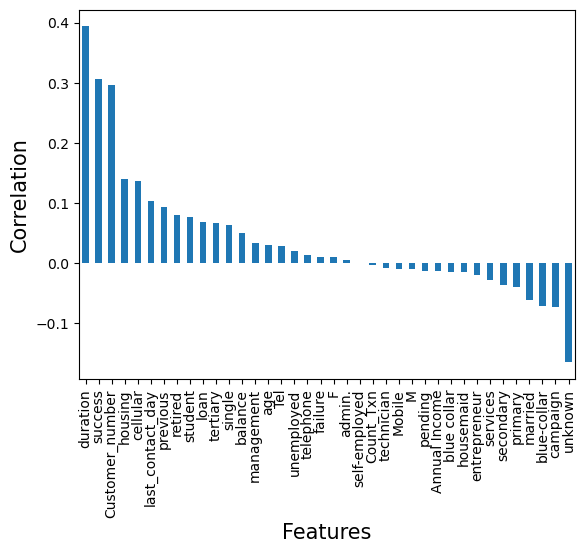

In [267]:
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()

In [269]:
df.head()

,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,previous,...,cellular,telephone,failure,pending,success,unknown,F,M,deposit,Term Deposit
0,1001,58,839368,2143,0,1.0,261.0,1,2,0,...,False,False,False,False,False,True,False,True,0.0,0.0
1,1002,44,1452858,29,0,1.0,151.0,1,2,0,...,False,False,False,False,False,True,False,True,0.0,0.0
2,1003,33,4851383,2,0,0.0,76.0,1,2,0,...,False,False,False,False,False,False,True,False,0.0,0.0
3,1004,47,3207754,1506,0,1.0,92.0,1,2,0,...,False,False,False,False,False,True,True,False,0.0,0.0
4,1005,33,2562322,1,1,1.0,198.0,1,2,0,...,False,False,False,False,False,True,False,True,0.0,0.0


In [271]:
df.drop(columns=['deposit'])

,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,previous,...,Tel,cellular,telephone,failure,pending,success,unknown,F,M,Term Deposit
0,1001,58,839368,2143,0,1.0,261.0,1,2,0,...,False,False,False,False,False,False,True,False,True,0.0
1,1002,44,1452858,29,0,1.0,151.0,1,2,0,...,False,False,False,False,False,False,True,False,True,0.0
2,1003,33,4851383,2,0,0.0,76.0,1,2,0,...,False,False,False,False,False,False,False,True,False,0.0
3,1004,47,3207754,1506,0,1.0,92.0,1,2,0,...,False,False,False,False,False,False,True,True,False,0.0
4,1005,33,2562322,1,1,1.0,198.0,1,2,0,...,False,False,False,False,False,False,True,False,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51,2229818,825,1,1.0,0.0,0,-1,0,...,False,True,False,False,False,False,True,False,True,1.0
45207,46208,121,2783556,1729,1,1.0,0.0,0,-1,0,...,False,True,False,False,False,False,True,False,True,1.0
45208,46209,72,443512,5715,1,1.0,1127.0,5,184,3,...,False,True,False,False,False,True,False,False,True,1.0
45209,46210,57,4193684,668,1,1.0,0.0,0,-1,0,...,False,False,True,False,False,False,True,True,False,0.0


In [273]:
df.to_csv("preprocessed_data.csv")